In [1]:
#!/usr/bin/python
from seqdata import getset
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
import numpy
random.seed(42)

X,y=getset(7)
X0_train,X0_test,y0_train,y0_test = train_test_split(X,y,random_state=1234567, shuffle=True)

def prep_data(AA):
    y_train=[1 if yy==AA else 0 for yy in y0_train]
    y_test=[1 if yy==AA else 0 for yy in y0_test]
    return X0_train,X0_test,y_train,y_test


In [102]:
from sklearn.linear_model import LogisticRegression
models=[]
scores=[]
for aa in range(20):
    X_train,X_test,y_train,y_test=prep_data(aa)
    model=LogisticRegression(class_weight="balanced")
    model.fit(X_train, y_train)
    print(aa,model.score(X_train, y_train),model.score(X_test, y_test))
    scores.append(model.score(X_test, y_test))
    models.append(model)
print(min(scores), max(scores), numpy.mean(scores),numpy.median(scores))


0 0.6151521655148732 0.6067372324808777
1 0.6281753015409709 0.6284478096268253
2 0.6120959780229214 0.6062479074918231
3 0.6224320727990729 0.619562697983466
4 0.6006266901317766 0.6013031497076927
5 0.6434304846117526 0.6432305750856319
6 0.5768897282911963 0.5742357516289371
7 0.6288964244323303 0.6330835200494476
8 0.5885908056831352 0.5914136341394318
9 0.5951581748723012 0.5890185170877437
10 0.5815856118813582 0.5785624146900512
11 0.6095462935141863 0.6074840969378558
12 0.6707730609091299 0.6675165469108141
13 0.580915997767953 0.5755492029153467
14 0.5713439498647894 0.566483813644441
15 0.5930634845688286 0.592546807798295
16 0.5385757822895652 0.5432279996909526
17 0.6491393741683479 0.6508022354425815
18 0.5995192514057603 0.5993973576450591
19 0.5953127012061639 0.593061886734142
0.5432279996909526 0.6675165469108141 0.6033956578845708 0.6003502536763758


In [103]:
aug_train=[]
aug_test=[]
for m in models:
    aug_train.append(m.predict_proba(X0_train)[:,1])
    aug_test.append(m.predict_proba(X0_test)[:,1])
aug_train=numpy.array(aug_train).T
aug_test=numpy.array(aug_test).T



(116485, 161)
(116485, 20) (116485, 20)
(20, 20)


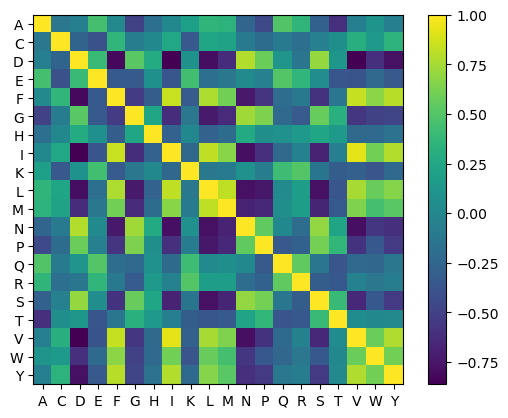

(20, 20)


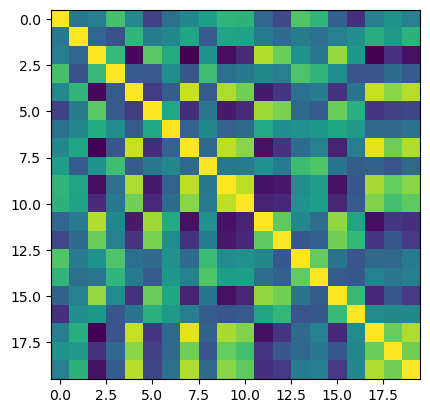

In [104]:
from sklearn.decomposition import PCA,NMF
#from sklearn.manifold import TSNE,MDS
#import umap
#import umap.plot
AAA="ACDEFGHIKLMNPQRSTVWY"
print (X0_train.shape)
red=aug_train#[X0_train[:,3*23+21]==1,:]
print(aug_train.shape,red.shape)
cv = numpy.corrcoef(red.T)
print(cv.shape)
plt.imshow(cv)
plt.xticks(range(20),AAA)
plt.yticks(range(20),AAA)
plt.colorbar()
plt.show()
cv = numpy.corrcoef(aug_test.T)
print(cv.shape)
plt.imshow(cv)
plt.show()

In [ ]:
freq=[sum(y0_train==a) for a in range(20)]
freq=numpy.array(freq)/sum(freq)
import math
print(freq)

AAA="ACDEFGHIKLMNPQRSTVWY"
SSS="~HE"
def make_vec(a,s):
    v=[]
    for aa, ss in zip(a,s):
        vv=numpy.zeros(23)
        vv[AAA.index(aa)]=1
        vv[SSS.index(ss)+20]=1
        v.append(vv)
    return numpy.array(v).flatten()


def seq_sc(sq,ss):
    sc=0
    
    a=set(sq)
    frq=[sq.count(aa)/len(sq) for aa in a]
    S=-sum([f*math.log(f) for f in frq])
    
    for pos in range(3, len(sq)-3):
        q=sq[pos-3:pos+4]
        s=ss[pos-3:pos+4]        
        v=make_vec(q,s)
        sc+=math.log(models[AAA.index(sq[pos])].predict_proba([v])[0][1])
    return sc#+len(sq)*S/2


ss="~~~~HHHHHHHHH~~~~~~HHHHHHHH~~~~~EEEEEEE~~~~~EEEEEEE~~~~~~HHHHHHH~~~~~EEEEEEEE~~~~"
sq=[random.choice(AAA) for i in ss]
sq[0]='G'
sq[1]='G'
sq[2]='G'
sq[-1]='G'
sq[-2]='G'
sq[-3]='G'
#sq=["G" for i in ss ]


cur=seq_sc(sq,ss)
for cyc in range(100000):
    pos1,pos2=random.sample(range(3,len(sq)-3),2)
    sq[pos1],sq[pos2]=sq[pos2],sq[pos1]
    new=seq_sc(sq,ss)
    if new>cur:
        cur=new
        print("".join(sq),cur) 
    else:    
        sq[pos1],sq[pos2]=sq[pos2],sq[pos1]
       
#  #for pos in range(3,len(sq)-3): 
#    pos=random.choice(range(3,len(sq)-3))
#    t=[]
#    cur=sq[pos]
#    for a in AAA:
#        sq[pos]=a
#        t.append(seq_sc(sq,ss))
#        if a==cur: tresh=t[-1]
#    better=[a for a,v in zip(AAA,t) if v>=tresh]
#    sq[pos]=random.choice(better)
    #sq[pos]=AAA[numpy.argmax(t)]
#    print("".join(sq),seq_sc(sq,ss))
##    q=sq[pos-3:pos+4]
##    s=ss[pos-3:pos+4]
##    v=make_vec(q,s)
##    proba=[m.predict_proba([v,])[0][1] for m in models]
##    proba=numpy.array(proba)/sum(proba)
##    #print(proba)
##    sel=numpy.random.choice(list(AAA), p=proba) 
##    #sel=AAA[proba.index(max(proba))]
##    sq[pos]=sel
##    print ("".join(sq))

[0.08569344 0.01226767 0.06384513 0.05697729 0.04104391 0.08075718
 0.02234622 0.0525132  0.05453063 0.08043096 0.01941022 0.05027257
 0.04655535 0.03773876 0.04362793 0.06387947 0.06000773 0.06827489
 0.01875778 0.04106967]
GGGRCWQPDFFIRCKGHFVTGSIKCCMTLICFGLDQESVPFLYDHQMGPCMFVKHMSWYSRDPDTNFSGDGPVYDHGGGGG -68.66308271445646
GGGRCWQPDFFIRCKGHFVTLSIKCCMTGICFGLDQESVPFLYDHQMGPCMFVKHMSWYSRDPDTNFSGDGPVYDHGGGGG -67.26069994144767
GGGRCWQPDFFIRCKGDFVTLSIKCCMTGICFGLDQESVPFLYDHQMGPCMFVKHMSWYSRDPHTNFSGDGPVYDHGGGGG -66.28111473956533
GGGRCWQPDFFIRCKGDFVTLSIKCCMTGICFGLDQESVPYLYDHQMGPCMFVKHMSWYSRDPHTNFSGDGPVFDHGGGGG -65.16878718281156
GGGRCWQPDFFIRCVGDFVTLSIKCCMTGICFGLDQESVPYLYDHQMGPCMFKKHMSWYSRDPHTNFSGDGPVFDHGGGGG -64.0005416324074
GGGRCWQPDFFIRNVGDFVTLSIKCCMTGICFGLDQESVPYLYDHQMGPCMFKKHMSWYSRDPHTCFSGDGPVFDHGGGGG -63.63908564892147
GGGRCWQPDFFIRNVGDFVTLSIKCCMTGICFGLDTESVPYLYDHQMGPCMFKKHMSWYSRDPHQCFSGDGPVFDHGGGGG -62.87019479778932
GGGRCWQPDFFIRNVGDFVTLSIKCCMTGICFGLDTKSVPYLYDHQMGPCMFKEHMSWYSRDPHQCFSG

GGGGRWQFDKMIENMDFIPDYRIDLKMTPFGPCFHGVMTDYSYDFKVCHCCHCHPCQPWDVRLQGLGSGFSFGSTVSGGGG -32.8125403574175
GGGGRWQFDKMIENMDFIPDYRIDLKMTPFGHCFHGVMTDYSYDFKVCHCCPCHPCQPWDVRLQGLGSGFSFGSTVSGGGG -32.58500589440483
GGGGRWQFDKMIENMDFIPDYRIDLKMTPFGHCFHGVMTDYSYDFKVCQCCPCHPCQPWDVRLHGLGSGFSFGSTVSGGGG -32.41003908417051
GGGGRWQFDKMIENMDFIPDYRIDLKMTPCGHCFHGVMTDYSYDFKVCQCCPCHPFQPWDVRLHGLGSGFSFGSTVSGGGG -31.549373608896037
GGGGRWQFDKMIENMDFIPDYRIDLKMTPCGHCFHGVMTDYSYDKFVCQCCPCHPFQPWDVRLHGLGSGFSFGSTVSGGGG -31.36968533203495
GGGGRWQFDKMIENMDFIPDYRIDLKMTPCGHCFHGVMTDYSYDKFVCHCCPCQPFQPWDVRLHGLGSGFSFGSTVSGGGG -31.36944940273744
GGGMRWQFDKMIENGDFIPDYRIDLKMTPCGHCFHGVMTDYSYDKFVCHCCPCQPFQPWDVRLHGLGSGFSFGSTVSGGGG -31.296445318787676
GGGMRWQFDKMIENGDFIPDYRIDLKMTPCGHCFHGVMTDYSYDKFVCHCCPCQPFQPWDVRLHGLGSGFSFSGTVSGGGG -31.23310154934059
GGGMRWQFDKMIENGDFIPDYRIDLKMTPCGHCFHGVMTDYSKDYFVCHCCPCQPFQPWDVRLHGLGSGFSFSGTVSGGGG -30.959088592639453
GGGMRWQFDEMIKNGDFIPDYRIDLKMTPCGHCFHGVMTDYSKDYFVCHCCPCQPFQPWDVRLHGLGSGFSFSGTVSGGGG -30.948

In [ ]:
model=LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(aug_train,y0_train)
print(model.score(aug_train, y0_train))
print(model.score(aug_test, y0_test))
print(model.coef_)
model=LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X0_train,y0_train)
print(model.score(X0_train, y0_train))
print(model.score(X0_test, y0_test))
print(model.coef_)

In [ ]:

X_train_2=numpy.concatenate([X_train,aug_train],axis=1)
X_test_2=numpy.concatenate([X_test,aug_test],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
#models=[]
scores=[]
for aa in range(20):
    X_train,X_test,y_train,y_test=prep_data(aa)
    #######
    aug_train=[]
    aug_test=[]
    for m in models:
        aug_train.append(m.predict_proba(X_train)[:,0])
        aug_test.append(m.predict_proba(X_test)[:,0])
    aug_train=numpy.array(aug_train).T
    aug_test=numpy.array(aug_test).T
    X_train_2=aug_train  #numpy.concatenate([X_train,aug_train],axis=1)
    X_test_2=aug_test    #numpy.concatenate([X_test,aug_test],axis=1)
    #######
    model=LogisticRegression(class_weight="balanced", max_iter=1000)
    model.fit(X_train_2, y_train,)
    print(aa,model.score(X_train_2, y_train),model.score(X_test_2, y_test))
    scores.append(model.score(X_test_2, y_test))
    #models.append(model)
print(min(scores), max(scores), numpy.mean(scores),numpy.median(scores))


In [ ]:
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score
models=[]
scores=[]
for aa in range(20):
    X_train,X_test,y_train,y_test=prep_data(aa)
    model=RandomForestClassifier(n_estimators=100,class_weight="balanced")
    model.fit(X_train, y_train)
    w0=y_train.count(0)
    w1=y_train.count(1)
    ww=[1.0/w1 if yy==1 else 1.0/w0 for yy in y_test]
    ny=model.predict(X_test)
    sc=accuracy_score(y_test,ny,sample_weight=ww)
    print(aa,model.score(X_train, y_train),model.score(X_test, y_test),sc)
    
    scores.append(model.score(X_test, y_test))
    models.append(model)
print(min(scores), max(scores), numpy.mean(scores),numpy.median(scores))


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
#print (model.coef_)

In [ ]:
from sklearn.svm import LinearSVC, SVC
model=LinearSVC()
#model=SVC(kernel='rbf')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=10,)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))